1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

The eigenvalues using eigendecomposition:
 [ 2.67796943e+01 -1.95382039e-15  2.00234114e+00]
The eigenvectors using eigendecomposition:
[-0.10719802 -0.58761337 -0.80200942]
[-0.81649658 -0.40824829  0.40824829]
[ 0.56731113 -0.69860136  0.4360209 ]
The eigenvalues with SVD: 
 [2.67814329e+01 2.00255866e+00 2.26558251e-32]
The eigenvectors with SVD:
[0.1072121  0.58759604 0.80202024]
[ 0.56730847 -0.69861594  0.436001  ]
[-0.81649658 -0.40824829  0.40824829]
First component has a variability of : 93.0428%
Second component has a variability of : 6.9572%
Third component has a variability of :  7.870980998737436e-34


Text(0, 0.5, 'x3')

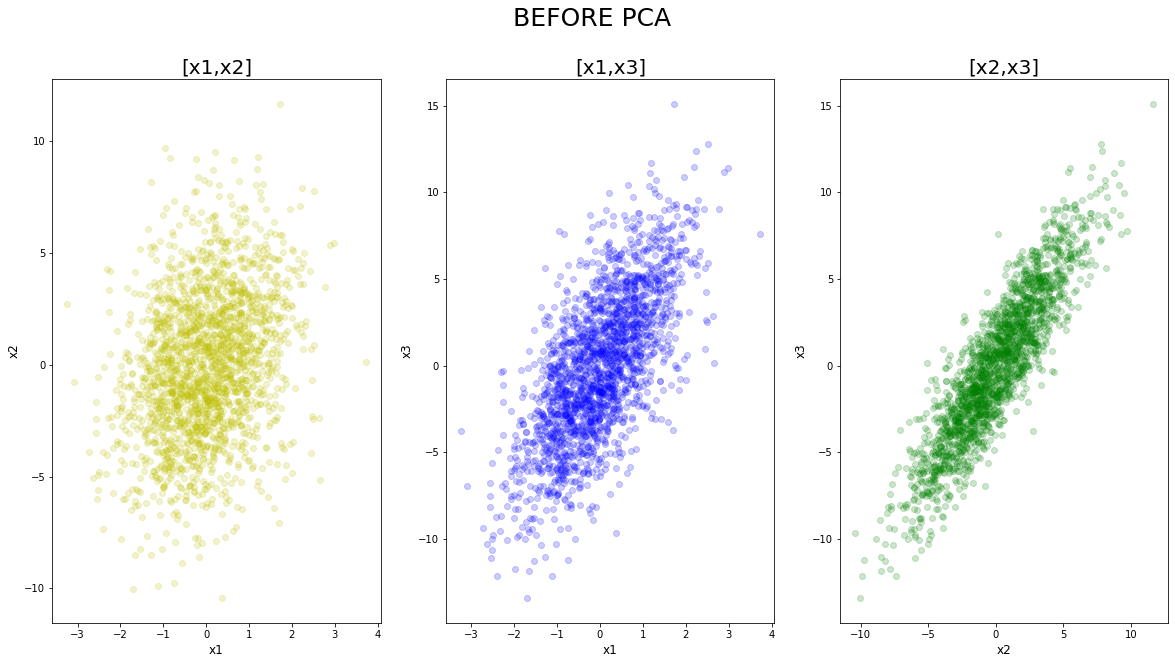

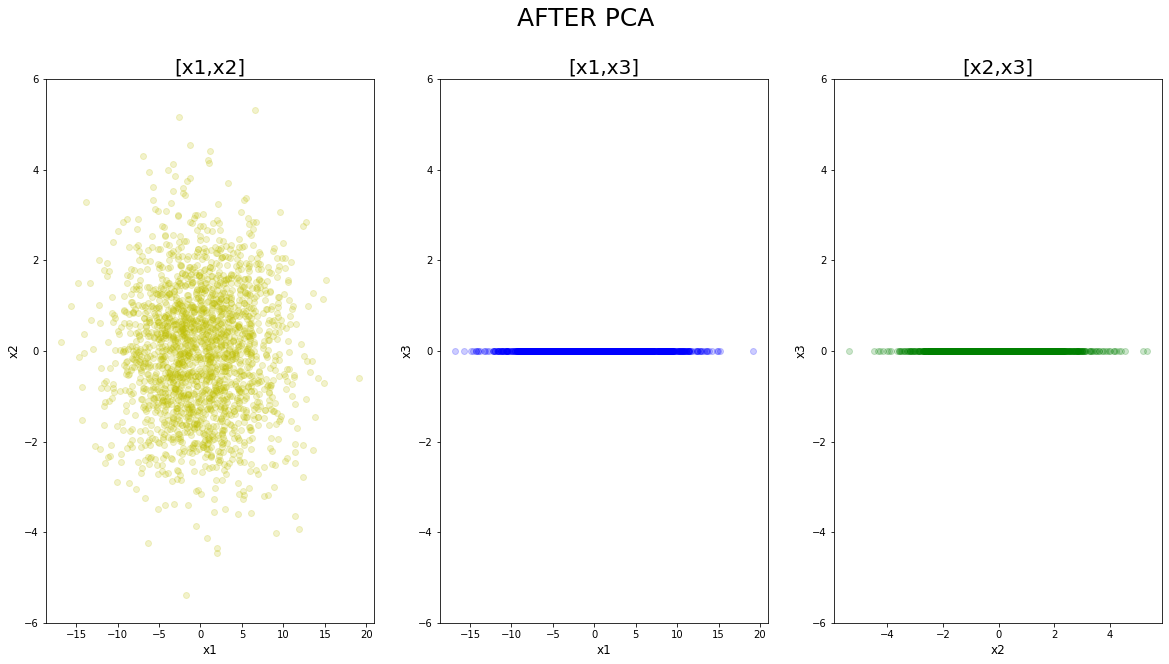

In [1]:
#1-PCA on 3D dataset

import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

N=2000

np.random.seed(22222)
x1= np.random.normal( 0, 1, N)
x2= x1 + np.random.normal( 0, 3, N)
x3= 2*x1+x2
dataset = pd.DataFrame({'x1' : x1,'x2' : x2,'x3' : x3,})

#Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
covar=np.cov(dataset,rowvar=False)
val, vec = la.eig(covar)
print ("The eigenvalues using eigendecomposition:\n", np.real_if_close(val))
print ("The eigenvectors using eigendecomposition:")
for i1 in range(len(val)):
    print( vec[:,i1])
    
#Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
U, D, Vt = la.svd(dataset)
val_svd = D**2/(N-1)
print ("The eigenvalues with SVD: \n",val_svd)
print ("The eigenvectors with SVD:")
for j in range(len(val_svd)):
    print (Vt[j,:])
       

print ("First component has a variability of : {0:.4%}".format(np.diag(val_svd)[0,0]/np.diag(val_svd).trace()))
print ("Second component has a variability of : {0:.4%}".format(np.diag(val_svd)[1,1]/np.diag(val_svd).trace()))
print('Third component has a variability of : ',np.diag(val_svd)[2,2]/np.diag(val_svd).trace())


dataset_PCA= np.dot(Vt,dataset.T)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
fig.suptitle('BEFORE PCA', fontsize = 25)

ax[0].scatter(dataset[['x1']],dataset[['x2']],alpha=0.2,color = "y")
ax[0].set_title("[x1,x2]",fontsize=20)
ax[0].set_xlabel("x1",fontsize=12)
ax[0].set_ylabel("x2",fontsize=12)
   
ax[1].scatter(dataset[['x1']], dataset[['x3']],alpha=0.2,color = "b")
ax[1].set_title("[x1,x3]",fontsize=20)
ax[1].set_xlabel("x1",fontsize=12)
ax[1].set_ylabel("x3",fontsize=12)
     
ax[2].scatter(dataset[['x2']], dataset[['x3']],alpha=0.2,color = "g")
ax[2].set_title("[x2,x3]",fontsize=20)
ax[2].set_xlabel("x2",fontsize=12)
ax[2].set_ylabel("x3",fontsize=12)

fig, ax1 = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
fig.suptitle('AFTER PCA', fontsize = 25)
plt.setp(ax1, ylim=(-6,6))

ax1[0].scatter(dataset_PCA[0,:], dataset_PCA[1,:], alpha=0.2,color = "y")
ax1[0].set_title("[x1,x2]",fontsize=20)
ax1[0].set_xlabel("x1",fontsize=12)
ax1[0].set_ylabel("x2",fontsize=12)

ax1[1].scatter(dataset_PCA[0,:], dataset_PCA[2,:], alpha=0.2,color = "b")
ax1[1].set_title("[x1,x3]",fontsize=20)
ax1[1].set_xlabel("x1",fontsize=12)
ax1[1].set_ylabel("x3",fontsize=12)

ax1[2].scatter(dataset_PCA[1,:], dataset_PCA[2,:], alpha=0.2,color = "g")
ax1[2].set_title("[x2,x3]",fontsize=20)
ax1[2].set_xlabel("x2",fontsize=12)
ax1[2].set_ylabel("x3",fontsize=12)

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

The eigenvalues using eigendecomposition:
 [ 2.67797010e+01  2.00234710e+00 -3.54799894e-16  1.81482145e-03
  1.45530888e-03  1.49705661e-03  1.73089016e-03  1.72231347e-03
  1.54081601e-03  1.57510208e-03  1.67178322e-03  1.61324455e-03
  1.64135263e-03]
The eigenvectors using eigendecomposition:
[-1.07197993e-01 -5.87613320e-01 -8.02009306e-01  1.05817667e-04
  1.18327918e-04  2.46006966e-04 -1.28646375e-04  1.83283454e-05
  1.13465730e-04 -3.48493198e-04 -5.93275443e-05  1.58858462e-05
  9.43879824e-05]
[-5.67310324e-01  6.98600106e-01 -4.36020542e-01  9.02667854e-04
 -2.07720293e-04 -4.41071158e-04  9.66656307e-04 -2.33827110e-05
 -6.74001409e-04  1.67264958e-04  6.33632807e-04  3.21436912e-04
 -3.37431462e-05]
[-8.16496581e-01 -4.08248290e-01  4.08248290e-01  4.49671865e-16
 -1.46613125e-16 -6.60942353e-16  2.17352653e-15 -1.13249812e-16
  4.85544032e-16  4.91798910e-16  5.00755498e-16  4.81849299e-16
 -4.05842154e-16]
[-2.66590471e-04  4.56293111e-04 -7.68878302e-05 -4.20343139e-

Text(0, 0.5, 'x3')

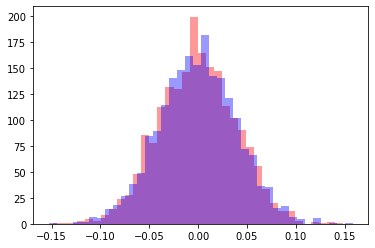

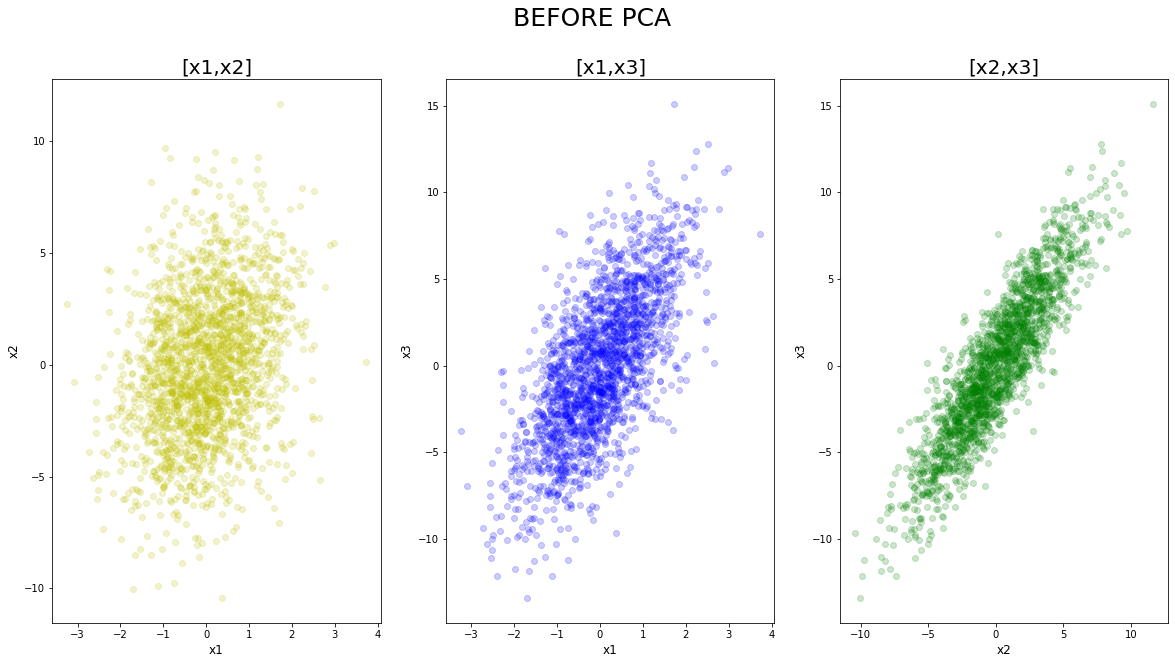

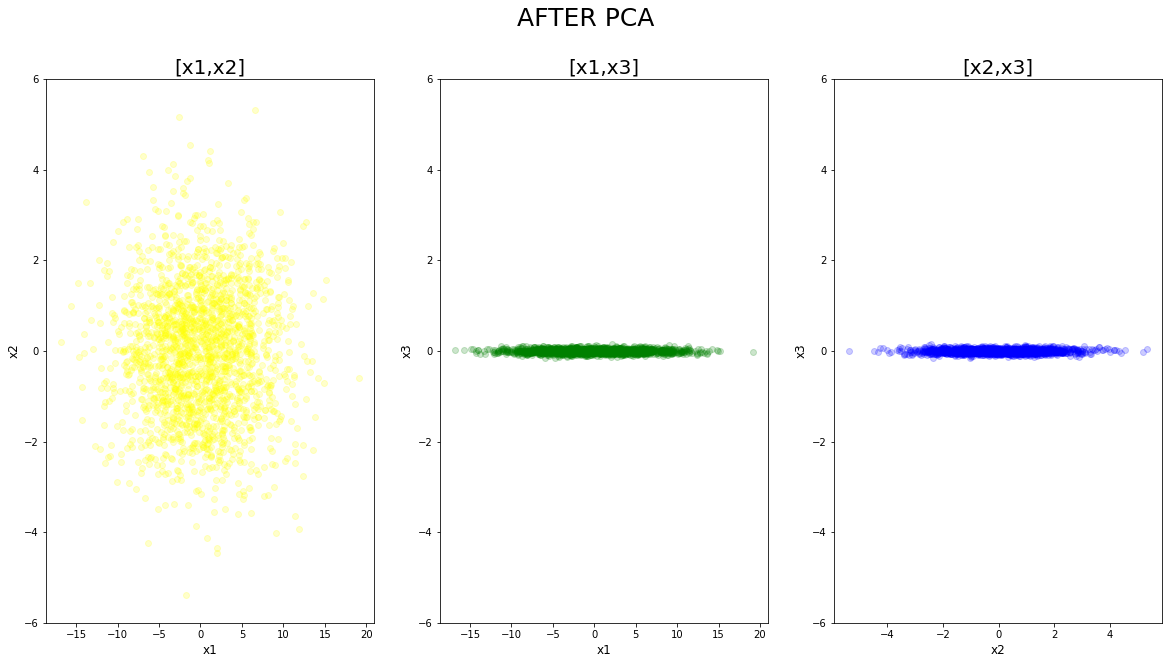

In [41]:
#2-PCA on a nD dataset

N = 2000
np.random.seed(22222)
x1= np.random.normal( 0, 1, N)
x2= x1 + np.random.normal( 0, 3, N)
x3= 2*x1+x2
n1= np.random.normal(0,1./25,N)
n2= np.random.normal(0,1./25,N)
n3= np.random.normal(0,1./25,N)
n4= np.random.normal(0,1./25,N)
n5= np.random.normal(0,1./25,N)
n6= np.random.normal(0,1./25,N)
n7= np.random.normal(0,1./25,N)
n8= np.random.normal(0,1./25,N)
n9= np.random.normal(0,1./25,N)
n10= np.random.normal(0,1./25,N)

plt.hist(n10, bins="auto", color='r', alpha=0.4)
plt.hist(n9, bins="auto", color='b', alpha=0.4)
dataset = pd.DataFrame({'x1' : x1,'x2' : x2,'x3' : x3, 'noise1' : n1, 'noise2' : n2, 'noise3' : n3, 'noise4' : n4, 'noise5' : n5, 'noise6' : n6, 'noise7' : n7, 'noise8' : n8, 'noise9' : n9, 'noise10' : n10,})
#Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
covar=np.cov(dataset,rowvar=False)
val, vec = la.eig(covar)
print ("The eigenvalues using eigendecomposition:\n", np.real_if_close(val))
print ("The eigenvectors using eigendecomposition:")
for i1 in range(len(val)):
    print( vec[:,i1])
    
#Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
U, D, Vt = la.svd(dataset)
val_svd = D**2/(N-1)
print ("The eigenvalues with SVD: \n",val_svd)
print ("The eigenvectors with SVD:")
for j in range(len(val_svd)):
    print (Vt[j,:])
       

for i in range(13):
    print("Component",i,"has a variability of : ",np.diag(val_svd)[i,i]/np.diag(val_svd).trace())


dataset_PCA= np.dot(Vt,dataset.T)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
fig.suptitle('BEFORE PCA', fontsize = 25)

ax[0].scatter(dataset[['x1']],dataset[['x2']],alpha=0.2,color = "y")
ax[0].set_title("[x1,x2]",fontsize=20)
ax[0].set_xlabel("x1",fontsize=12)
ax[0].set_ylabel("x2",fontsize=12)
   
ax[1].scatter(dataset[['x1']], dataset[['x3']],alpha=0.2,color = "b")
ax[1].set_title("[x1,x3]",fontsize=20)
ax[1].set_xlabel("x1",fontsize=12)
ax[1].set_ylabel("x3",fontsize=12)
     
ax[2].scatter(dataset[['x2']], dataset[['x3']],alpha=0.2,color = "g")
ax[2].set_title("[x2,x3]",fontsize=20)
ax[2].set_xlabel("x2",fontsize=12)
ax[2].set_ylabel("x3",fontsize=12)

fig, ax1 = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
fig.suptitle('AFTER PCA', fontsize = 25)
plt.setp(ax1, ylim=(-6,6))

ax1[0].scatter(dataset_PCA[0,:], dataset_PCA[1,:], alpha=0.2,color = "yellow")
ax1[0].set_title("[x1,x2]",fontsize=20)
ax1[0].set_xlabel("x1",fontsize=12)
ax1[0].set_ylabel("x2",fontsize=12)

ax1[1].scatter(dataset_PCA[0,:], dataset_PCA[2,:], alpha=0.2,color = "green")
ax1[1].set_title("[x1,x3]",fontsize=20)
ax1[1].set_xlabel("x1",fontsize=12)
ax1[1].set_ylabel("x3",fontsize=12)

ax1[2].scatter(dataset_PCA[1,:], dataset_PCA[2,:], alpha=0.2,color = "blue")
ax1[2].set_title("[x2,x3]",fontsize=20)
ax1[2].set_xlabel("x2",fontsize=12)
ax1[2].set_ylabel("x3",fontsize=12)

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [27]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2023-01-20 12:59:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: 'data/magic04.data.1'

magic04.data.1      100%[===================>]   1.41M   349KB/s    in 4.6s    

2023-01-20 13:00:03 (311 KB/s) - 'data/magic04.data.1' saved [1477391/1477391]

--2023-01-20 13:00:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5400 (5.3K) [application/x-httpd-php]
Saving to: 'data/magic04.names.1'

magic04.names.1     100%[===================>]   5.27K  

Eigendecomposition: 

Eigenvalues: 
 [6.57979140e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187259e+02 4.33599171e+02 1.17330074e+02 8.63965822e-02
 1.07363851e-02 3.85322859e-04]
Eigenvectors: 
 [[-3.27812305e-01 -1.34406332e-01  6.55078481e-02  8.63988253e-01
   9.45511967e-02 -1.98552026e-02  3.38166662e-01  3.99907112e-03
  -4.54836725e-04  4.57080123e-05]
 [-1.13810001e-01 -5.38837224e-02 -1.89938175e-02  3.19766485e-01
  -1.97548493e-02  2.32592322e-02 -9.38307839e-01  1.33847863e-02
   6.74902809e-04 -5.73158421e-05]
 [-3.06076690e-03  6.59372017e-04  1.05931761e-03  6.93028658e-03
   2.65185255e-03  1.33441545e-04 -1.08823228e-02 -9.27765187e-01
  -3.72229862e-01  2.26331399e-02]
 [ 9.27109146e-04 -2.58205308e-04 -5.10399700e-04 -2.60555110e-03
  -1.53899865e-03 -3.46437681e-05  3.06287144e-03  3.22020557e-01
  -7.69222364e-01  5.51887659e-01]
 [ 5.21882399e-04 -1.52710005e-04 -2.94635944e-04 -1.51275933e-03
  -9.19340567e-04 -2.21501607e-05  1.81386903e-03  1.880017

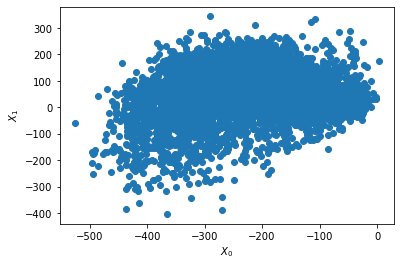

In [40]:
#Loading the dataset\n",
df = pd.read_csv('/Users/diogjen/Downloads/data/magic04.data', header=None)
X = df[[0,1,2,3,4,5,6,7,8,9]]
X = X.T
#Eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix\n",
cov_X = np.cov(X)
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_X)
eig_val_cov = np.real_if_close(eig_val_cov)
i = eig_val_cov.argsort()[::-1]
eig_val_cov = eig_val_cov[i]
eig_vec_cov = eig_vec_cov[:,i]
print("Eigendecomposition: \n")
print("Eigenvalues: \n", eig_val_cov)
print("Eigenvectors: \n", eig_vec_cov)
var_perc_2 = np.real(np.sum(eig_val_cov[:2])/np.sum(eig_val_cov))*100
var_perc_5 = np.real(np.sum(eig_val_cov[:5])/np.sum(eig_val_cov))*100
var_perc_6 = np.real(np.sum(eig_val_cov[:6])/np.sum(eig_val_cov))*100
print("\n\n")
print("The percentual of dataset variability using the 2 principal components is {var_perc_2}%")
print("The percentual of dataset variability using the 5 principal components is {var_perc_5}%")
print("The percentual of dataset variability using the 6 principal components is {var_perc_6}%")
#Redefining the data in the basis yielded by the PCA procedure\n"
eig_vec_cov_perc = eig_vec_cov[:,:2]
X_perc = np.dot(eig_vec_cov_perc.T, X)
plt.figure()
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.scatter(X_perc[0,:], X_perc[1,:])